# Student performance prediction
Group: 3<br>
Group members: 郭銍恩、駱沛承、葉信甫、蕭淳云、蔡逸澄<br>
Dataset: Student performance prediction<br>
Dataset source: https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics<br>
Description: This dataset contains information on the performance of high school students in mathematics, including their grades and demographic information. The data was collected from three high schools in the United States.<br>

Columns:<br>
Gender: The gender of the student (male/female)<br>
Race/ethnicity: The student's racial or ethnic background (Asian, African-American, Hispanic, etc.)<br>
Parental level of education: The highest level of education attained by the student's parent(s) or guardian(s)<br>
Lunch: Whether the student receives free or reduced-price lunch (yes/no)<br>
Test preparation course: Whether the student completed a test preparation course (yes/no)<br>
Math score: The student's score on a standardized mathematics test<br>
Reading score: The student's score on a standardized reading test<br>
Writing score: The student's score on a standardized writing test<br>

In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

## Read dataset

In [3]:
df = pd.read_csv('studentPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


## Sort, filter, add, delete, or groupby your data & loop function

In [5]:
# filter null values
df.isnull().any().sum()

0

### Add ,sort column & loop function

In [6]:
# calculate the average of the total score using a loop
for i in range(len(df)):
    df['average_total_score'] = round((df['math score'] + df['reading score'] + df['writing score']) / 3)
df_sort = df.sort_values(by=['average_total_score'], ascending=False)
df_sort

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_total_score
378,male,group D,bachelor's degree,standard,completed,100,100,100,100.0
566,male,group D,associate's degree,standard,completed,99,100,100,100.0
857,male,group E,bachelor's degree,standard,completed,100,100,100,100.0
921,male,group D,associate's degree,standard,completed,100,100,98,99.0
772,female,group E,bachelor's degree,standard,completed,98,100,99,99.0
...,...,...,...,...,...,...,...,...,...
513,female,group C,associate's degree,free/reduced,none,28,32,28,29.0
376,male,group C,high school,standard,none,31,27,19,26.0
982,male,group C,some high school,standard,none,28,27,23,26.0
480,female,group C,high school,standard,none,21,30,26,26.0


In [7]:
# average_total_score pass or fail
df['pass'] = np.where(df['average_total_score'] > 60, 'pass', 'fail')
pass_count = df['pass'].value_counts()['pass']
fail_count = df['pass'].value_counts()['fail']
print('Pass count: ', pass_count)
print('Fail count: ', fail_count)
df

Pass count:  732
Fail count:  268


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_total_score,pass
0,female,group D,some college,standard,completed,59,70,78,69.0,pass
1,male,group D,associate's degree,standard,none,96,93,87,92.0,pass
2,female,group D,some college,free/reduced,none,57,76,77,70.0,pass
3,male,group B,some college,free/reduced,none,70,70,63,68.0,pass
4,female,group D,associate's degree,standard,none,83,85,86,85.0,pass
...,...,...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71,75.0,pass
996,male,group C,some college,standard,none,80,66,66,71.0,pass
997,female,group A,high school,standard,completed,67,86,86,80.0,pass
998,male,group E,high school,standard,none,80,72,62,71.0,pass


## Statistical Analysis & Visualization

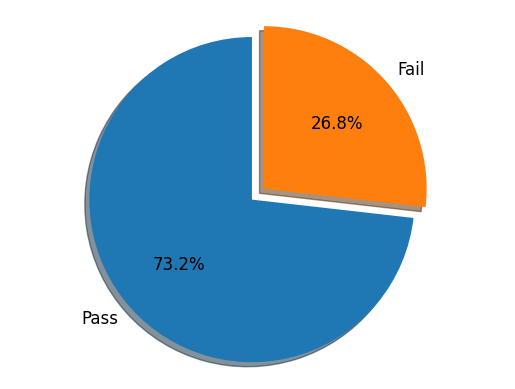

In [8]:
# draw figure between pass and fail
lables = ['Pass', 'Fail']
sizes = [pass_count, fail_count]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=lables, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 12})
plt.axis('equal')
plt.show()


std: 14.02
mean: 69.10
q1: 59.75, q3: 79.00


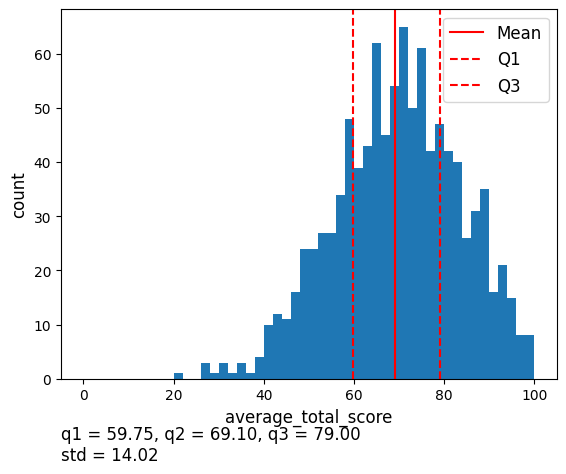

In [9]:
# analyze average_total_score std, mean, 4 quartiles
mean_atscore = df['average_total_score'].mean()
std_atscore = df['average_total_score'].std()
q1_atscore, q3_atscore = np.percentile(df['average_total_score'], [25, 75])
print(f'std: {std_atscore:.2f}')
print(f'mean: {mean_atscore:.2f}')
print(f'q1: {q1_atscore:.2f}, q3: {q3_atscore:.2f}')

plt.hist(df['average_total_score'], bins=50, range=(0, 100))
plt.axvline(mean_atscore, color='r', linestyle='-')
plt.axvline(q1_atscore, color='r', linestyle='--')
plt.axvline(q3_atscore, color='r', linestyle='--')
plt.legend({'Mean':mean_atscore, 'Q1':q1_atscore, 'Q3':q3_atscore}, fontsize=12)
plt.text(-5, -15, f'q1 = {q1_atscore:.2f}, q2 = {mean_atscore:.2f}, q3 = {q3_atscore:.2f}\nstd = {std_atscore:.2f}', fontsize=12)
plt.xlabel('average_total_score', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()

parental level of education
associate's degree    71.67
master's degree       71.52
bachelor's degree     71.30
some college          69.71
high school           67.11
some high school      65.44
Name: average_total_score, dtype: float64


Text(0.5, 1.0, 'Comparison of Mean Total Score Density by Parental Level of Education')

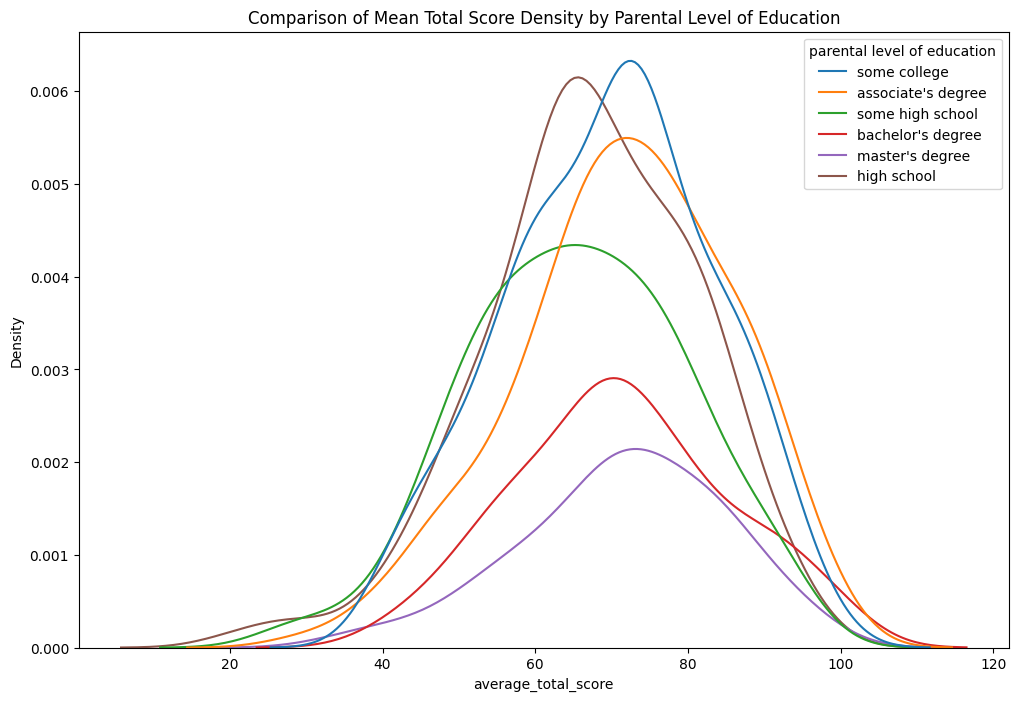

In [40]:
# Calculate the mean average_total_score for each parental level of education
mean_scores = df.groupby("parental level of education")["average_total_score"].mean().round(2)
print(mean_scores.sort_values(ascending=False))

# Compare the mean average_total_score for each parental level of education
plt.figure(figsize=(12, 8))

sns.kdeplot(x="average_total_score", data=df, hue="parental level of education")
plt.title("Comparison of Mean Total Score Density by Parental Level of Education")

race/ethnicity
group A    67.57
group B    66.43
group C    66.96
group D    70.29
group E    76.31
Name: average_total_score, dtype: float64


[]

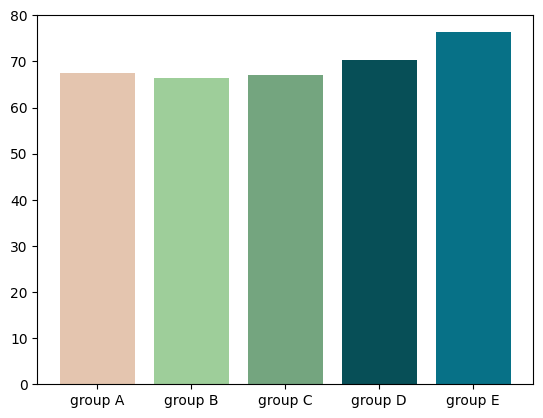

In [10]:
# Calculate the mean average_total_score for each race/ethnicity
group_mean_scores = df.groupby("race/ethnicity")["average_total_score"].mean().round(2)
print(group_mean_scores)

h = ["group A", "group B", "group C", "group D", "group E"]
x_pos = np.arange(len(h))
color = ['#E4C5AF','#9ECE9A', '#74A57F','#074F57', '#077187']
plt.bar(x_pos, group_mean_scores, color=color)
plt.xticks(x_pos, h)
plt.plot()


mal average score: 67.70
femal average score: 70.54


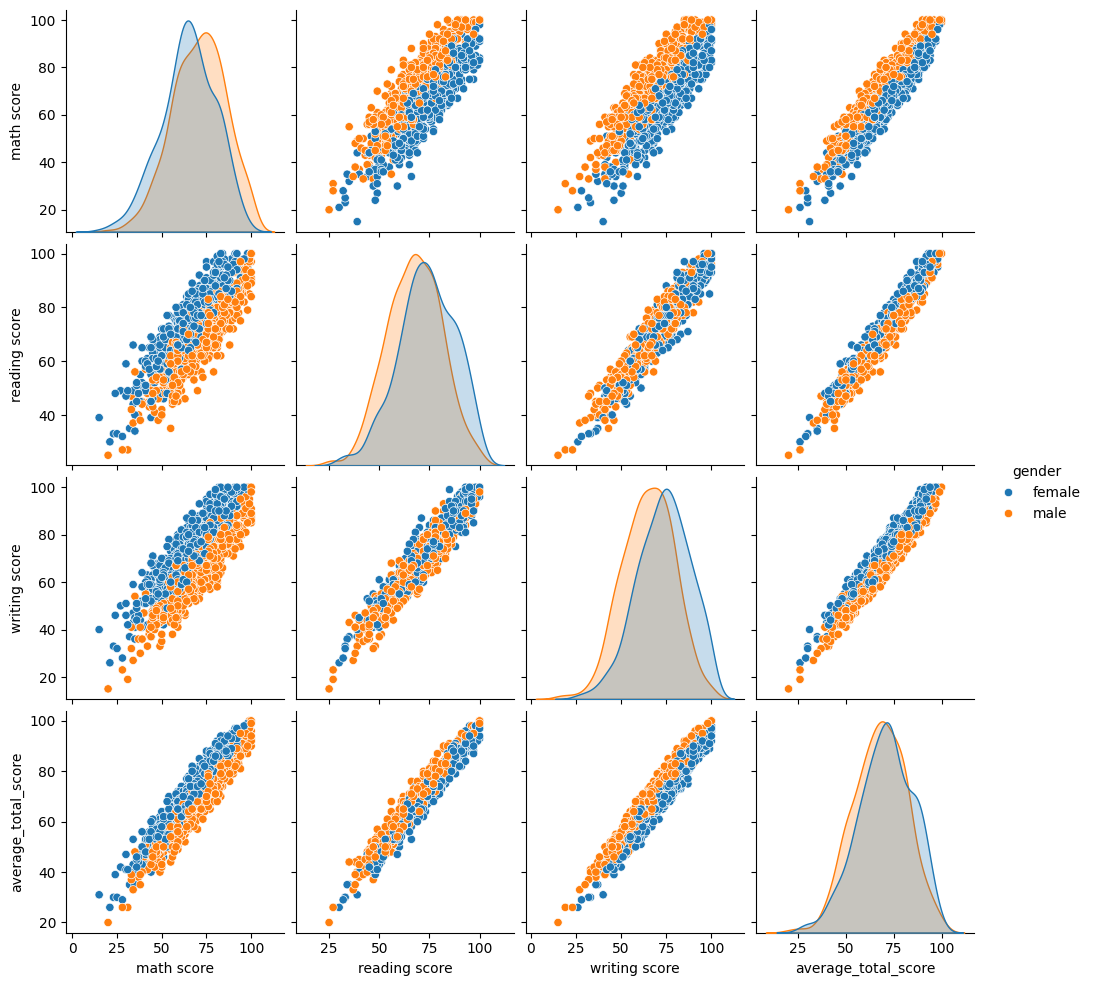

In [11]:
# Compare gender and average_total_score
male_average_score = df[df["gender"] == "male"]["average_total_score"].mean()
female_average_score = df[df["gender"] == "female"]["average_total_score"].mean()
print(f"mal average score: {male_average_score:.2f}\nfemal average score: {female_average_score:.2f}")

sns.pairplot(df, hue='gender')

### encoding

In [12]:
# Convert categorical variables to numerical values
df_transform = df
label_encoder = LabelEncoder()
for i in df_transform.columns:
    if df_transform[i].dtype == 'object':
        df_transform[i] = label_encoder.fit_transform(df_transform[i])
# df_transform = df_transform.drop(['pass'], axis=1)
df_transform

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_total_score,pass
0,0,3,4,1,0,59,70,78,69.0,1
1,1,3,0,1,1,96,93,87,92.0,1
2,0,3,4,0,1,57,76,77,70.0,1
3,1,1,4,0,1,70,70,63,68.0,1
4,0,3,0,1,1,83,85,86,85.0,1
...,...,...,...,...,...,...,...,...,...,...
995,1,2,4,1,1,77,77,71,75.0,1
996,1,2,4,1,1,80,66,66,71.0,1
997,0,0,2,1,0,67,86,86,80.0,1
998,1,4,2,1,1,80,72,62,71.0,1


<Axes: title={'center': 'Correlation Matrix'}>

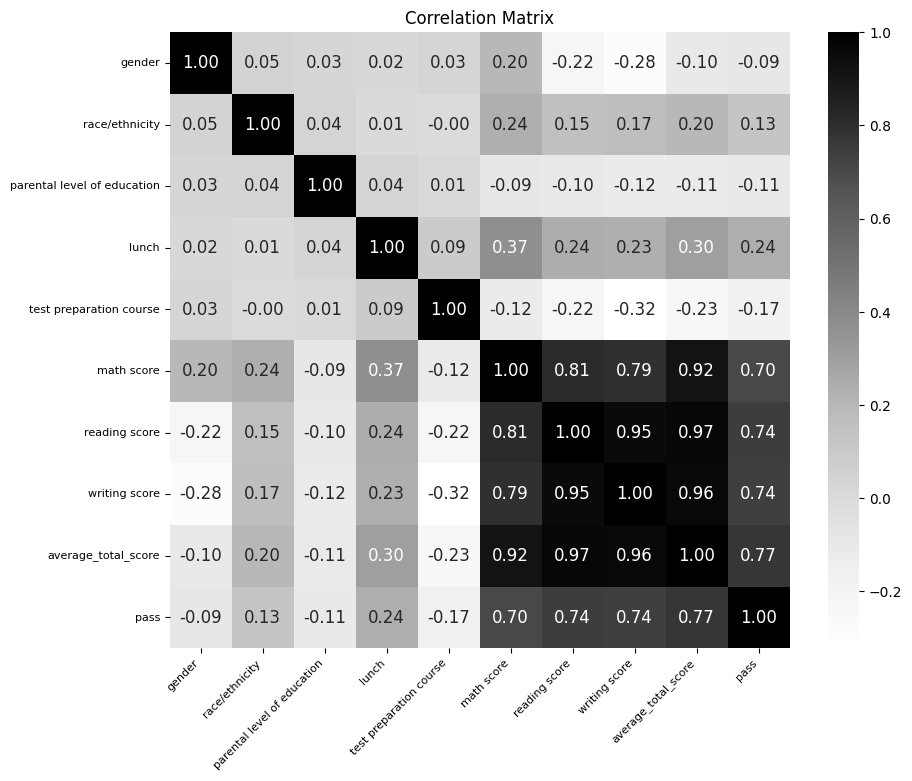

In [13]:
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix', fontdict={'fontsize': 12})
heatmap = sns.heatmap(df_transform.corr(), annot=True, annot_kws={'size': 12}, cmap='Greys', fmt='.2f')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=8)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, ha='right', fontsize=8)
heatmap

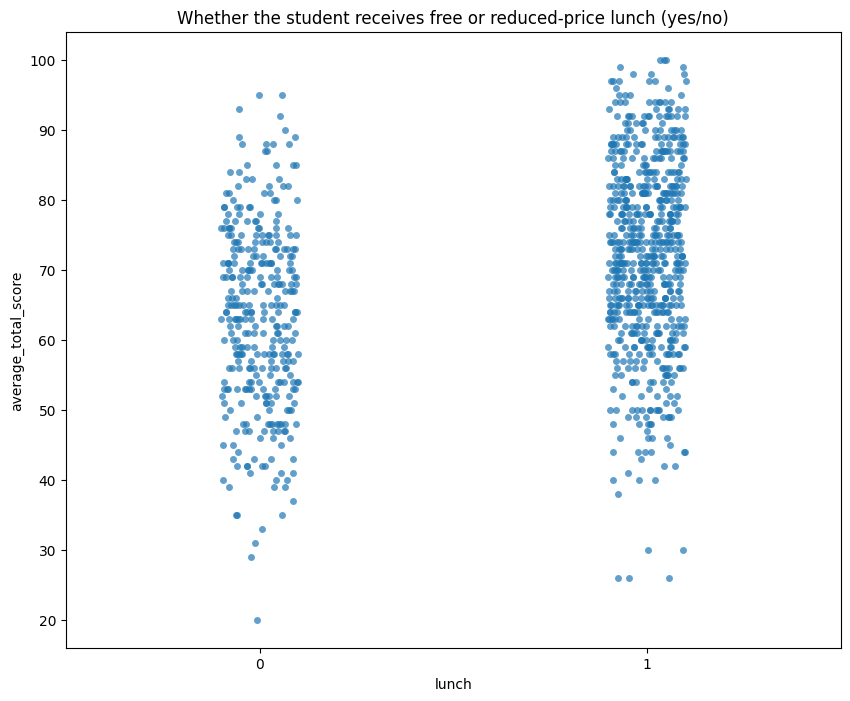

In [14]:
plt.figure(figsize=(10, 8))
sns.stripplot(x="lunch", y="average_total_score", data=df, jitter=True, alpha=0.7)
plt.title("Whether the student receives free or reduced-price lunch (yes/no)")
plt.show()

### Significance Statistics T Test

In [15]:
from scipy.stats import pearsonr, ttest_ind
corr, _ = pearsonr(df_transform['math score'], df_transform['lunch'])
print('Pearsons correlation: %.3f' % corr)

standard_lunch = df_transform[df_transform['lunch'] == 0]['average_total_score'].mean()
free_or_reduced_lunch = df_transform[df_transform['lunch'] == 1]['average_total_score'].mean()
print(f'standard lunch: {standard_lunch:.2f}\nfree or reduced lunch: {free_or_reduced_lunch:.2f}')

t_test, p_value = ttest_ind(df_transform[df_transform['lunch'] == 0]['average_total_score'], df_transform[df_transform['lunch'] == 1]['average_total_score'])
print(f'lunch and average_total_score')
print(f't-test: {t_test}\np-value: {p_value}')
print(f'p-value < 0.05, significant difference between the two groups\n')

Pearsons correlation: 0.372
standard lunch: 63.24
free or reduced lunch: 72.12
lunch and average_total_score
t-test: -9.93440271130077
p-value: 3.052790790958314e-22
p-value < 0.05, significant difference between the two groups



## Machine Learning

$$\text{Accuracy}= {TP + TN \over TP + FP + FN +TN }$$
$$\text{Precision}= {TP \over TP + FP }$$
$$\text{Recall}= {TP \over TP + FN }$$
$$\text{F1-score}= 2 \times {(Precision \times Recall) \over (Precision + Recall) }$$

Random Forest Classifier
y_pred[:11]: [1 1 0 1 0 0 1 1 1 0 1]
Accuracy: 0.62
Precious: 0.71
Recall: 0.74
F1-score: 0.73


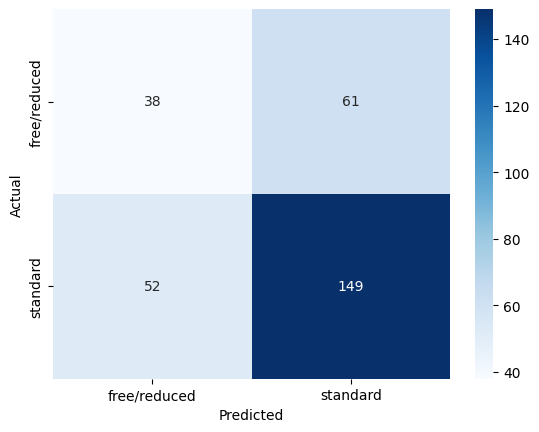

In [16]:
# Hypothesis: The student's lunch will affect the student's average total score.

# ### Random Forest Classifier
df_ml = df
for i in df_ml.columns:
    if df_ml[i].dtype == 'object':
        df_ml[i] = label_encoder.fit_transform(df[i])
X = df_ml[["math score", "average_total_score"]]
y = df_ml["lunch"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(f'Random Forest Classifier')
print(f'y_pred[:11]: {y_pred[:11]}')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'Precious: {precision_score(y_test, y_pred):.2f}')
print(f'Recall: {recall_score(y_test, y_pred):.2f}')
print(f'F1-score: {f1_score(y_test, y_pred):.2f}')

# plt confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g', xticklabels=['free/reduced', 'standard'], yticklabels=['free/reduced', 'standard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Linear Regression
y_pred[:11]: [76.7  73.46 51.83 78.08 52.23 76.21 72.95 73.64 73.59 53.41 79.5 ]
Mean squared error: 73.68
R-squared: 0.61


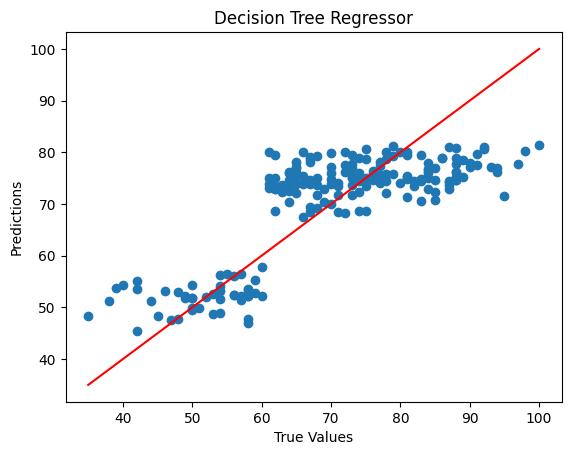

In [17]:
# Hypothesis: The student's lunch will affect the student's average total score.
# Use features other than scores to predict average_total_score

# Linear Regression
X = df.drop(["math score","reading score","writing score","average_total_score"], axis=1)
y = df['average_total_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
# dtr = DecisionTreeRegressor()
# dtr.fit(X_train, y_train)
# y_pred = dtr.predict(X_test)
y_pred = np.round(y_pred, 2)
print("Linear Regression")
print(f"y_pred[:11]: {y_pred[:11]}")
print(f'Mean squared error: {mean_squared_error(y_test, y_pred):.2f}')
print(f"R-squared: {r2_score(y_test, y_pred):.2f}")

plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Decision Tree Regressor")

max = y_test.max()
min = y_test.min()
plt.plot([min, max], [min, max], color='red')
plt.show()


## Conclusion